In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
company = pd.read_csv('companies.csv') 

In [3]:
company.head()

id  Unnamed: 0.1 entity_type  entity_id  parent_id  \
0      c:1             0     Company          1        NaN   
1     c:10             1     Company         10        NaN   
2    c:100             2     Company        100        NaN   
3  c:10000             3     Company      10000        NaN   
4  c:10001             4     Company      10001        NaN   

                 name     normalized_name                    permalink  \
0            Wetpaint            wetpaint            /company/wetpaint   
1             Flektor             flektor             /company/flektor   
2               There               there               /company/there   
3             MYWEBBO             mywebbo             /company/mywebbo   
4  THE Movie Streamer  the movie streamer  /company/the-movie-streamer   

     category_code     status  ... first_milestone_at last_milestone_at  \
0              web  operating  ...         2010-09-05        2013-09-18   
1      games_video   acquired  ...                NaN               NaN   
2      games_video   acquired  ...         2003-02-01        2011-09-23   
3  network_hosting  operating  ...                NaN               NaN   
4      games_video  operating  ...                NaN               NaN   

  milestones relationships        created_by           created_at  \
0        5.0          17.0  initial-importer  2007-05-25 06:51:27   
1        NaN           6.0  initial-importer  2007-05-31 21:11:51   
2        4.0          12.0  initial-importer  2007-08-06 23:52:45   
3        NaN           NaN               NaN  2008-08-24 16:51:57   
4        NaN           NaN               NaN  2008-08-24 17:10:34   

            updated_at        lat         lng   ROI  
0  2013-04-13 03:29:00  47.606209 -122.332071  15.5  
1  2008-05-23 23:23:14  34.021122 -118.396467   NaN  
2  2013-11-04 02:09:48  37.562992 -122.325525   NaN  
3  2008-09-06 14:19:18        NaN         NaN   NaN  
4  2008-09-06 14:19:18        NaN         NaN   NaN  

[5 rows x 44 columns]

In [4]:
company.drop(['region', 'city', 'state_code','id', 'Unnamed: 0.1',
              'entity_type', 'entity_id', 'parent_id', 'created_by','created_at', 'updated_at',
             'domain', 'homepage_url', 'twitter_username', 'logo_url','logo_width', 'logo_height', 
              'short_description', 'description', 'overview', 'tag_list', 'name','normalized_name', 
              'permalink', 'invested_companies'], axis = 1, inplace = True) 

In [5]:
company.drop_duplicates(inplace=True) # delete duplicates

In [6]:
col_percent = pd.DataFrame(company.isnull().sum() * 100 / len(company))
# drop columns with more then 98% null values
for col in col_percent.index:
    if col_percent.loc[col,0] > 98:
        company.drop(col, axis = 1, inplace=True)

In [7]:
company = company.dropna( how='any',subset=['status', 'country_code', 'category_code','founded_at'])

In [8]:
## Find the IQR

# For funding_total_usd
Q1_ftu = company.funding_total_usd.quantile(0.25)
 
Q3_ftu = company.funding_total_usd.quantile(0.75)

IQR_ftu = Q3_ftu - Q1_ftu

# For funding_rounds
Q1_fr = company.funding_rounds.quantile(0.25)
 
Q3_fr = company.funding_rounds.quantile(0.75)

IQR_fr = Q3_fr - Q1_fr


## Find the Upper and Lower limit

# For funding_total_usd
upper_ftu = Q3_ftu+1.5*IQR_ftu
lower_ftu = Q1_ftu-1.5*IQR_ftu

# For funding_rounds
upper_fr = Q3_fr+1.5*IQR_fr
lower_fr = Q1_fr-1.5*IQR_fr

## Find outliers

# For funding_total_usd
outlier_ftu = company.loc[(company.funding_total_usd < lower_ftu) | (company.funding_total_usd > upper_ftu)]

# For funding_rounds
outlier_fr = company.loc[(company.funding_rounds < lower_fr) | (company.funding_rounds > upper_fr)]

## Drop the outliers

# For funding_total_usd
company = company.loc[(company.funding_total_usd > lower_ftu) & (company.funding_total_usd < upper_ftu)]

# For funding_rounds
company = company.loc[(company.funding_rounds > lower_fr) & (company.funding_rounds < upper_fr)]
   

In [9]:
from datetime import datetime

In [10]:
date_columns = ['founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at']

for col in date_columns:
    company[col] = pd.to_datetime(company[col]).dt.year

In [11]:
company

category_code     status  founded_at  closed_at country_code  \
13                   web   acquired        2007        NaN          USA   
20             cleantech  operating        2003        NaN          USA   
26                mobile  operating        2003        NaN          AUS   
32             education  operating        2010        NaN          USA   
36               medical  operating        2006        NaN          USA   
...                  ...        ...         ...        ...          ...   
196526            mobile     closed        2008     2012.0          USA   
196537            social  operating        2011        NaN          CAN   
196540       games_video     closed        2006     2012.0          USA   
196549  public_relations  operating        2007        NaN          USA   
196552         ecommerce  operating        2007        NaN          USA   

       first_investment_at last_investment_at  investment_rounds  \
13                     NaN                NaN                NaN   
20                     NaN                NaN                NaN   
26                     NaN                NaN                NaN   
32                     NaN                NaN                NaN   
36                     NaN                NaN                NaN   
...                    ...                ...                ...   
196526                 NaN                NaN                NaN   
196537                 NaN                NaN                NaN   
196540                 NaN                NaN                NaN   
196549                 NaN                NaN                NaN   
196552                 NaN                NaN                NaN   

        first_funding_at  last_funding_at  funding_rounds  funding_total_usd  \
13                2008.0           2008.0             1.0          5000000.0   
20                2011.0           2012.0             3.0         10125293.0   
26                2003.0           2003.0             1.0           250000.0   
32                2011.0           2011.0             1.0           100000.0   
36                2011.0           2012.0             2.0         11300000.0   
...                  ...              ...             ...                ...   
196526            2008.0           2008.0             1.0           130000.0   
196537            2011.0           2011.0             1.0           500000.0   
196540            2008.0           2009.0             2.0          1100000.0   
196549            2008.0           2008.0             1.0           750000.0   
196552            2008.0           2008.0             1.0           475000.0   

        first_milestone_at  last_milestone_at  milestones  relationships  \
13                  2008.0             2012.0         3.0           14.0   
20                  2010.0             2010.0         1.0            6.0   
26                  2007.0             2007.0         1.0            2.0   
32                  2010.0             2010.0         1.0            NaN   
36                     NaN                NaN         NaN            2.0   
...                    ...                ...         ...            ...   
196526              2008.0             2009.0         2.0            3.0   
196537              2011.0             2011.0         1.0            2.0   
196540              2005.0             2008.0         2.0            4.0   
196549              2013.0             2013.0         1.0           14.0   
196552              2006.0             2008.0         2.0            1.0   

              lat         lng  
13      37.386052 -122.083851  
20      30.267153  -97.743061  
26     -27.469771  153.025124  
32            NaN         NaN  
36      42.018989  -71.007822  
...           ...         ...  
196526  37.774929 -122.419415  
196537  28.805267  -97.003598  
196540  37.774929 -122.419415  
196549  37.338208 -121.886329  
196552  34.035633 -118.515590  

[16880 rows x 18 columns]

In [12]:
company.status.value_counts()

operating    14350
acquired      1340
closed        1057
ipo            133
Name: status, dtype: int64

### Visualization and Analysis

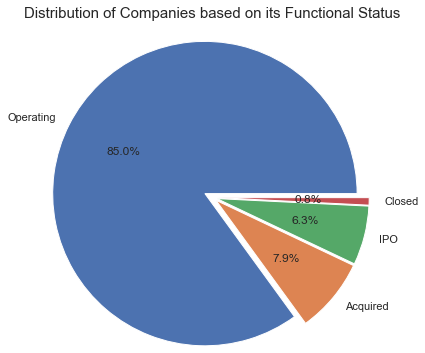

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)


ax.pie(company.status.value_counts(), explode = (0.1,0.05,0.05,0.05), labels = ['Operating', 'Acquired', 'IPO', 'Closed'], autopct='%1.1f%%', radius = 1.75)
ax.set_title("Distribution of Companies based on its Functional Status\n\n\n\n", fontsize = 15)

plt.show()

From the above pie chart, we can see that almost 80 % of the companies in the dataset are operational. 

The dataset is biased, w.r.t the status of the company

In [14]:
sub1 = pd.DataFrame(company.category_code.value_counts())

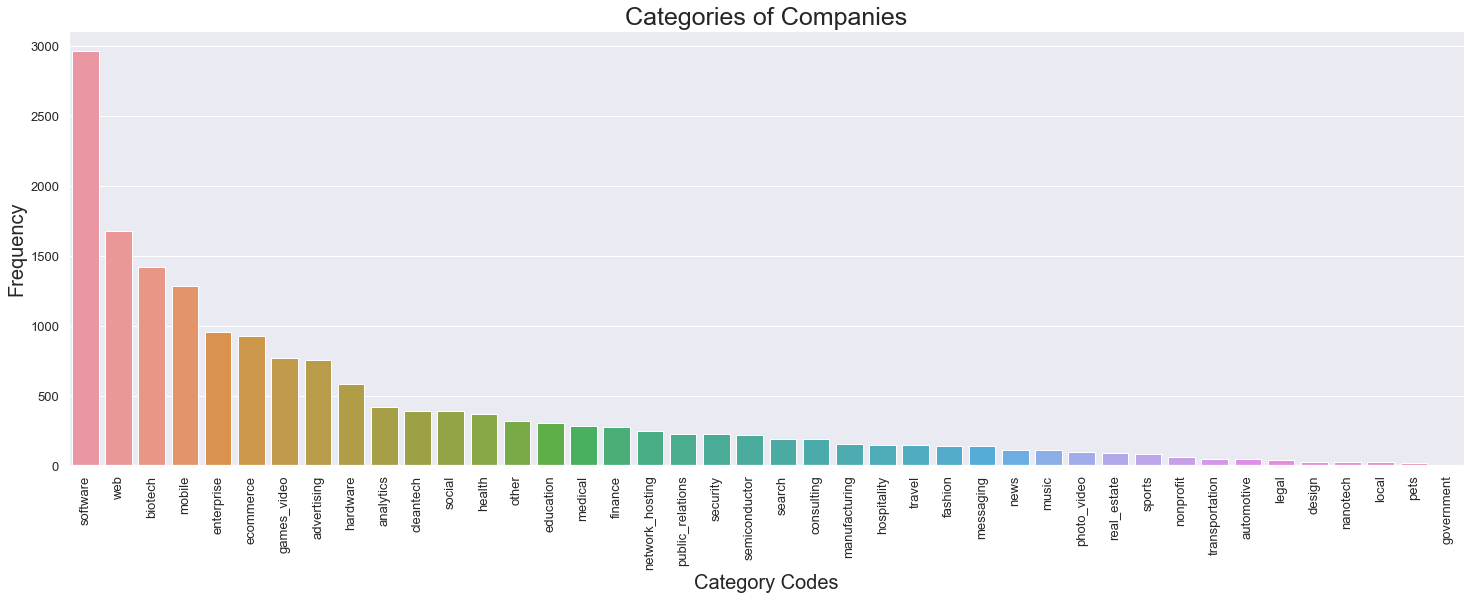

In [15]:
plt.figure(figsize=(25,8))
sns.barplot(x = sub1.index, y=sub1.category_code)

plt.title("Categories of Companies", fontsize= 25)
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Category Codes', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)

plt.show()

We can observe that companies in 'software', 'web', etc are top among the different categories. 

In [16]:
sub2 = pd.DataFrame(company.groupby(['category_code', 'status']).status.count().sort_values(ascending = False)).rename(columns={'status':'status_count'}).reset_index()

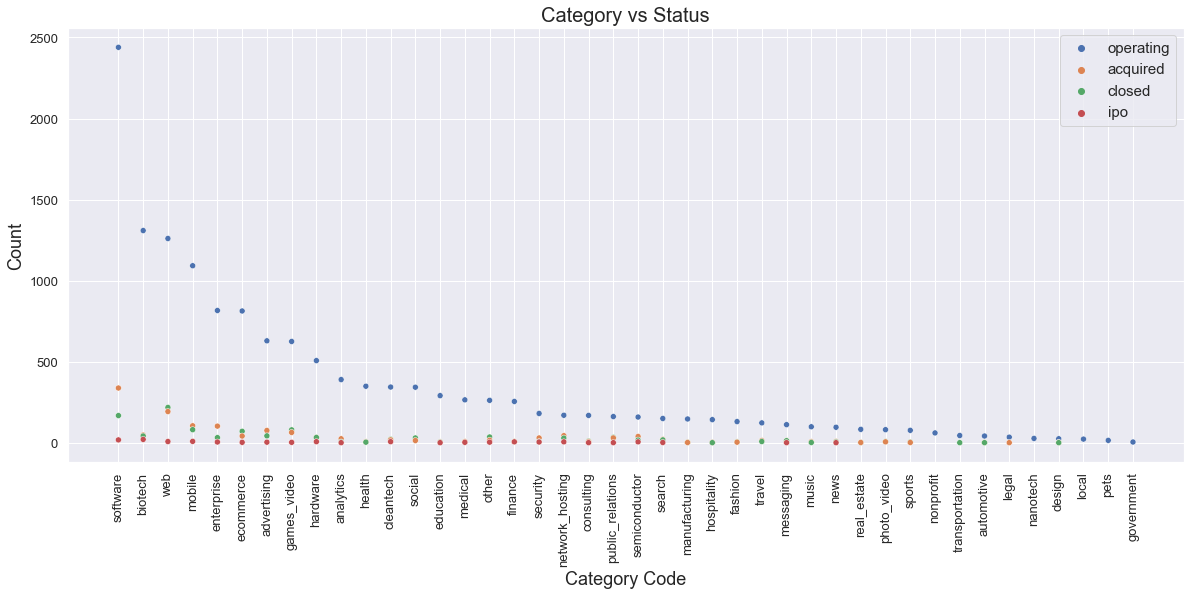

In [17]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=sub2.category_code, y=sub2.status_count, hue = sub2.status)

plt.title("Category vs Status", fontsize= 20)
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Category Code', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.legend(fontsize=15)
plt.show()

In [18]:
company.groupby(by = 'category_code').status.value_counts().sort_values(ascending=False)


category_code     status   
software          operating    2439
biotech           operating    1309
web               operating    1260
mobile            operating    1092
enterprise        operating     816
                               ... 
transportation    closed          1
automotive        closed          1
analytics         ipo             1
hospitality       closed          1
public_relations  ipo             1
Name: status, Length: 140, dtype: int64

From the above graph, we can see that the most of the companies in the top categories are currently in Operating status. 

But we cannot conclude it as such, as the dataset is biased, having 84% of companies in Oerating status

### Understanding the Status Column

In [19]:
company.status.value_counts()

operating    14350
acquired      1340
closed        1057
ipo            133
Name: status, dtype: int64

In [20]:
sub3 = company[['status', 'category_code', 'founded_at', 'closed_at', 'first_investment_at', 'last_investment_at', 'first_funding_at', 'last_funding_at', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones']]

In [21]:
def found_year(status):
    founded_year = pd.DataFrame(sub3[sub3.status == status].founded_at.value_counts())
    plt.figure(figsize=(25,10))
    sns.barplot(x = founded_year.index, y = founded_year.founded_at)

    plt.xticks(rotation = 75, fontsize = 18)
    plt.yticks(fontsize = 20)
    plt.xlabel('\nYear of Origination', fontsize = 30)
    plt.ylabel('Count of Years\n', fontsize = 30)
    plt.title("\nOrigination Years - "+status+'\n', fontsize= 30)
    plt.show()

In [22]:
def closed_year(status):
    closed_year = pd.DataFrame(sub3[sub3.status == status].closed_at.value_counts())
    plt.figure(figsize=(25,10))
    sns.barplot(x = closed_year.index, y = closed_year.closed_at)

    plt.xticks(rotation = 75, fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xlabel('\nYear of Origination', fontsize = 30)
    plt.ylabel('Count of Years\n', fontsize = 30)
    plt.title("\nDistribution of Closed Years of Companies - "+status+'\n', fontsize= 30)
    plt.show()

In [23]:
def category_plot(status):
    sub = pd.DataFrame(sub3[sub3.status == status].category_code.value_counts())
    plt.figure(figsize=(25,10))
    sns.barplot(x = sub.index, y=sub.category_code)
    plt.title("\nDistribution of Categories of Companies - "+status+'\n', fontsize= 30)
    plt.xticks(rotation = 75, fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.xlabel('Category Codes', fontsize = 20)
    plt.ylabel('Frequency', fontsize = 20)
    plt.show()

#### Closed

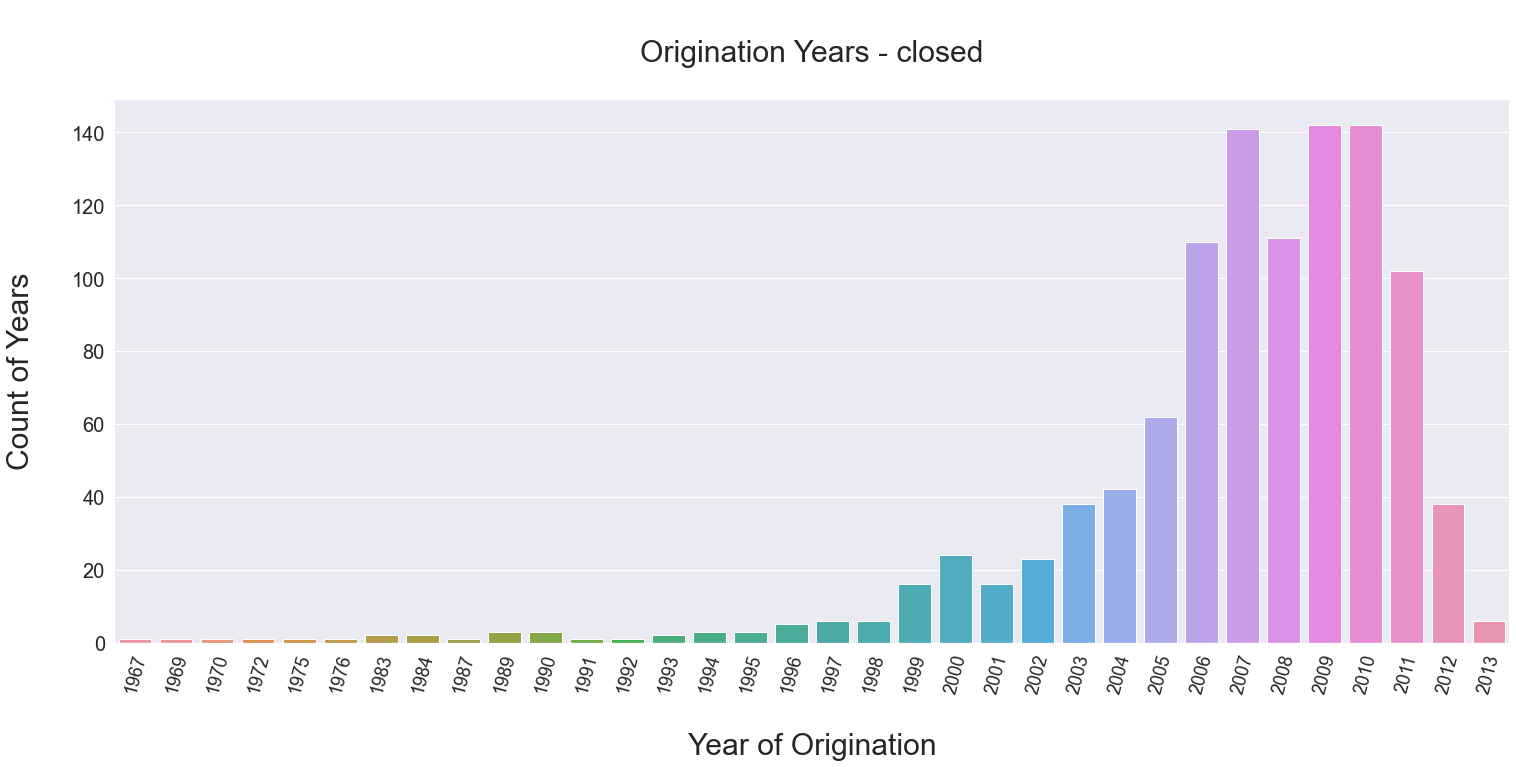

In [24]:
found_year('closed')

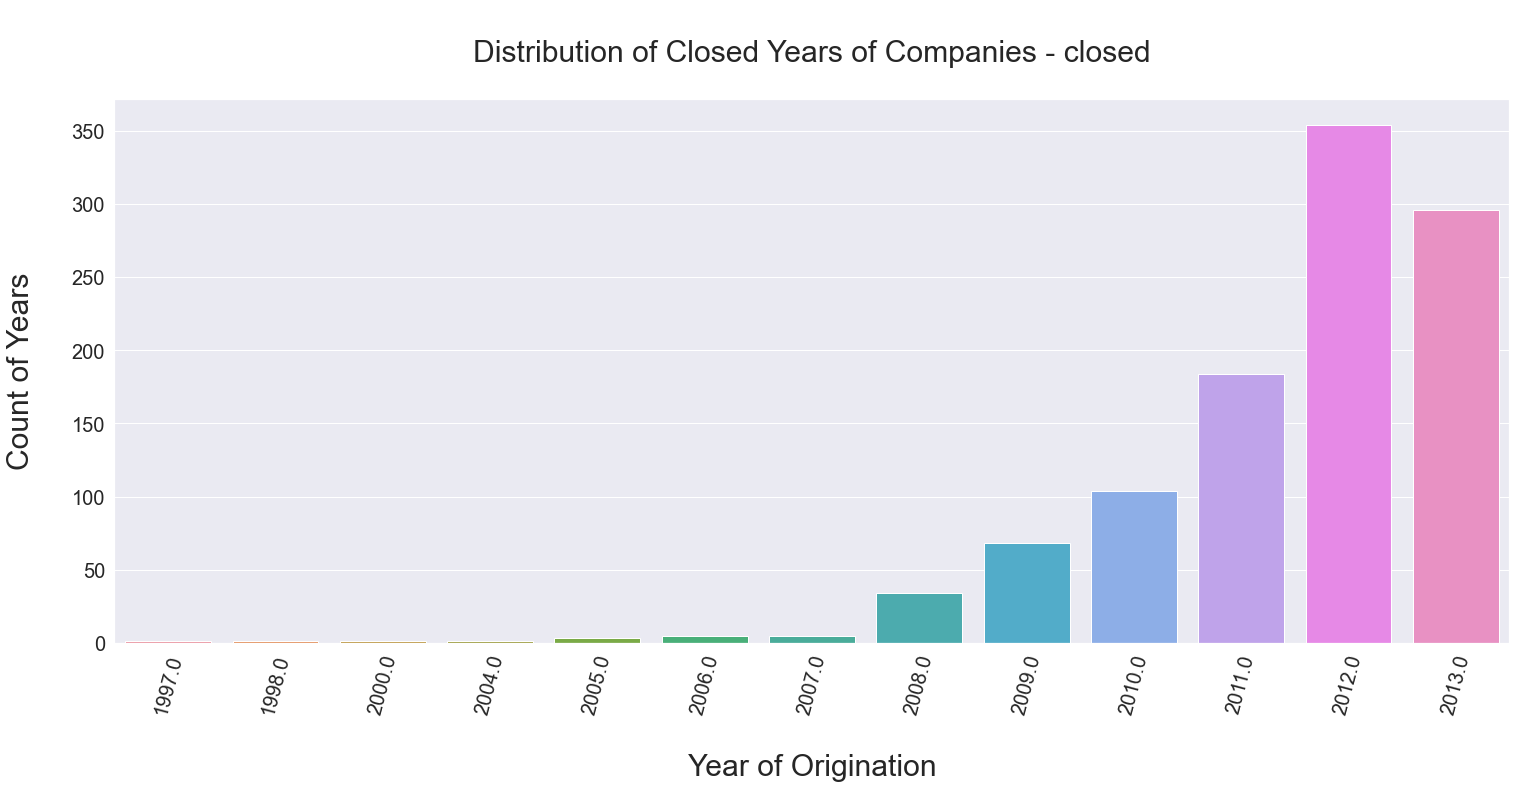

In [25]:
closed_year('closed')

From the above 2 graphs we can see a hike in origination and closing between 2000 to 2012. Even very old companies also were closed atmost by 2013. 

Next we will try to see if any company that did not even had a life of atleast 5 years. 

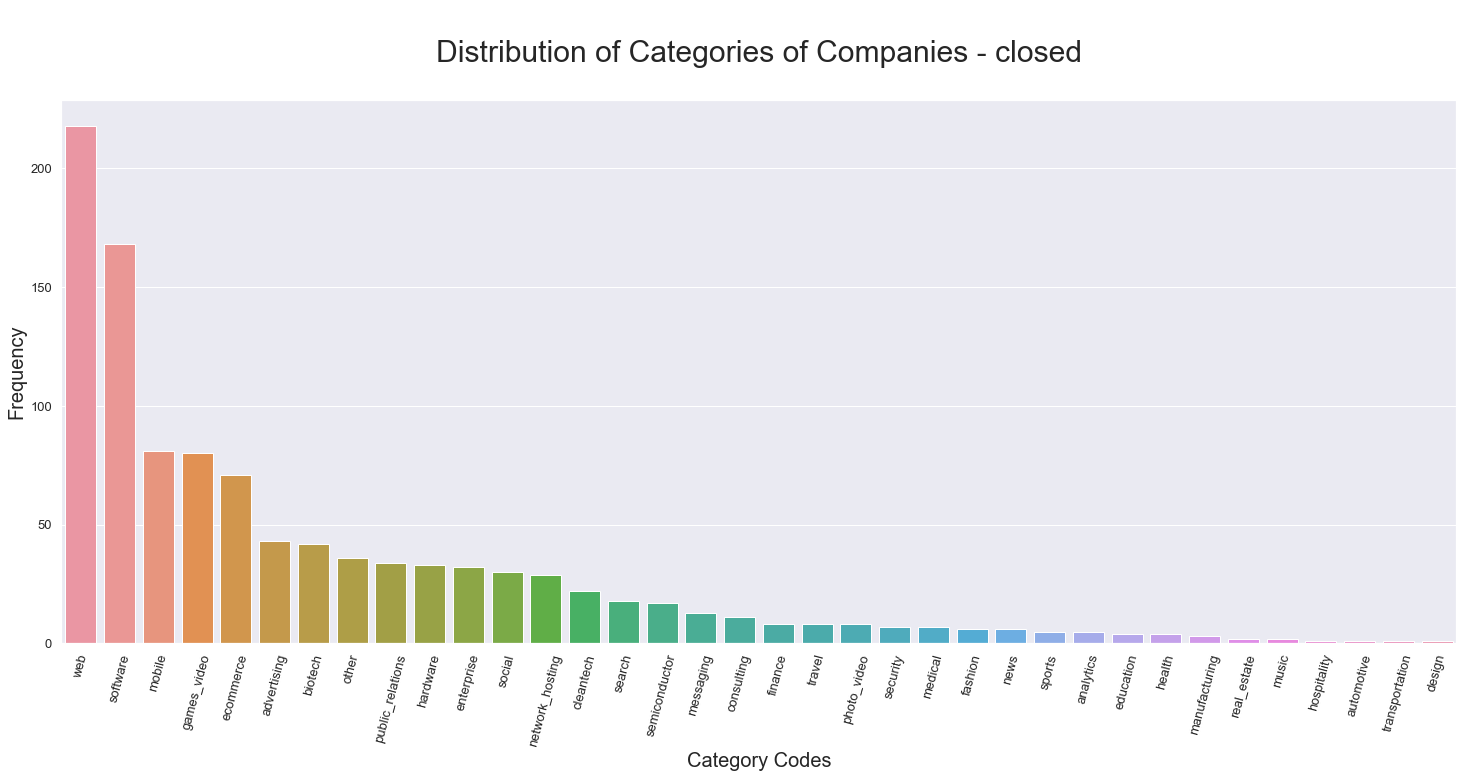

In [26]:
category_plot('closed')

In [27]:
(company.closed_at - company.founded_at <5).sum()

660

From the above result, it is evident that there 600+ startups which does not had atleast 5 yesrs life. 

In [28]:
sub4 = sub3[company.closed_at - company.founded_at <5]

In [29]:
sub5 = pd.DataFrame(sub4.category_code.value_counts())

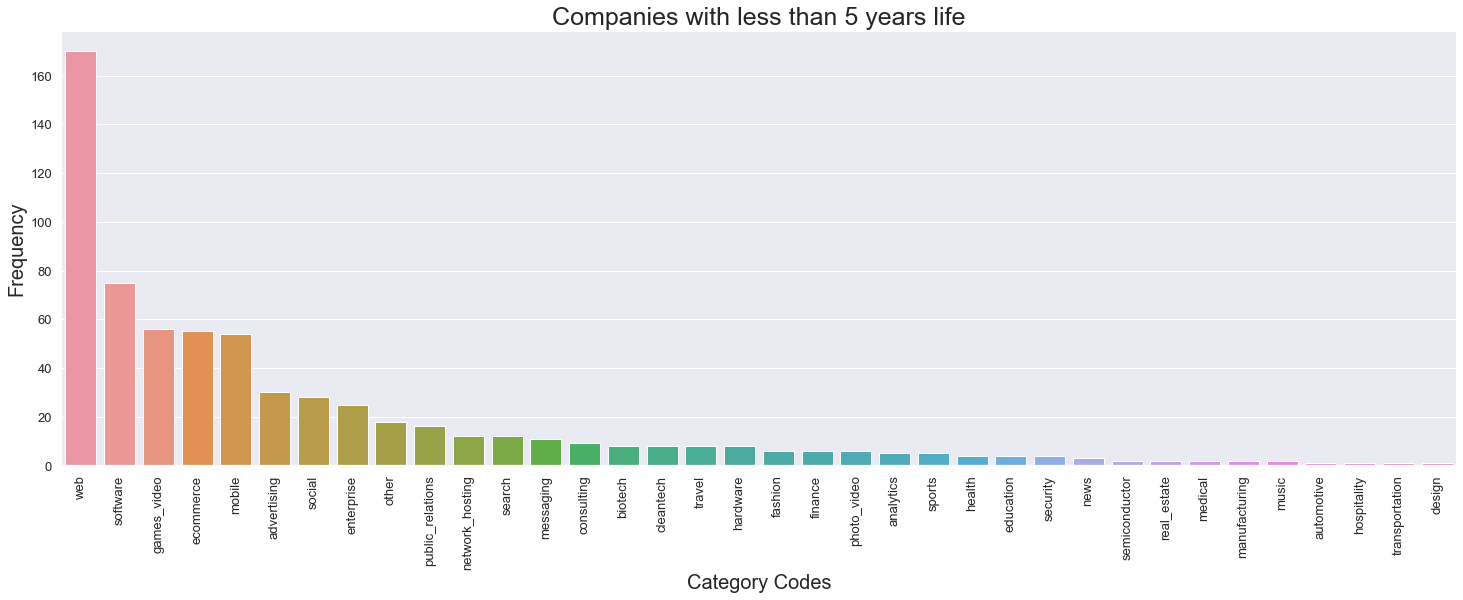

In [30]:
plt.figure(figsize=(25,8))
sns.barplot(x = sub5.index, y=sub5.category_code)

plt.title("Companies with less than 5 years life", fontsize= 25)
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Category Codes', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)

plt.show()

Previously, we had observed Technical companies are in higher count of origination. It dominates when it comes to closed companies as well. 

We may infer that, a company's existence and continuation is not always dependent on the functional category. 

In [31]:
company[company.status == 'closed'].funding_total_usd.mean()

3335433.2346263006

An average of 7.8 Million US dollars were funded for these closed companies.

#### Acquired

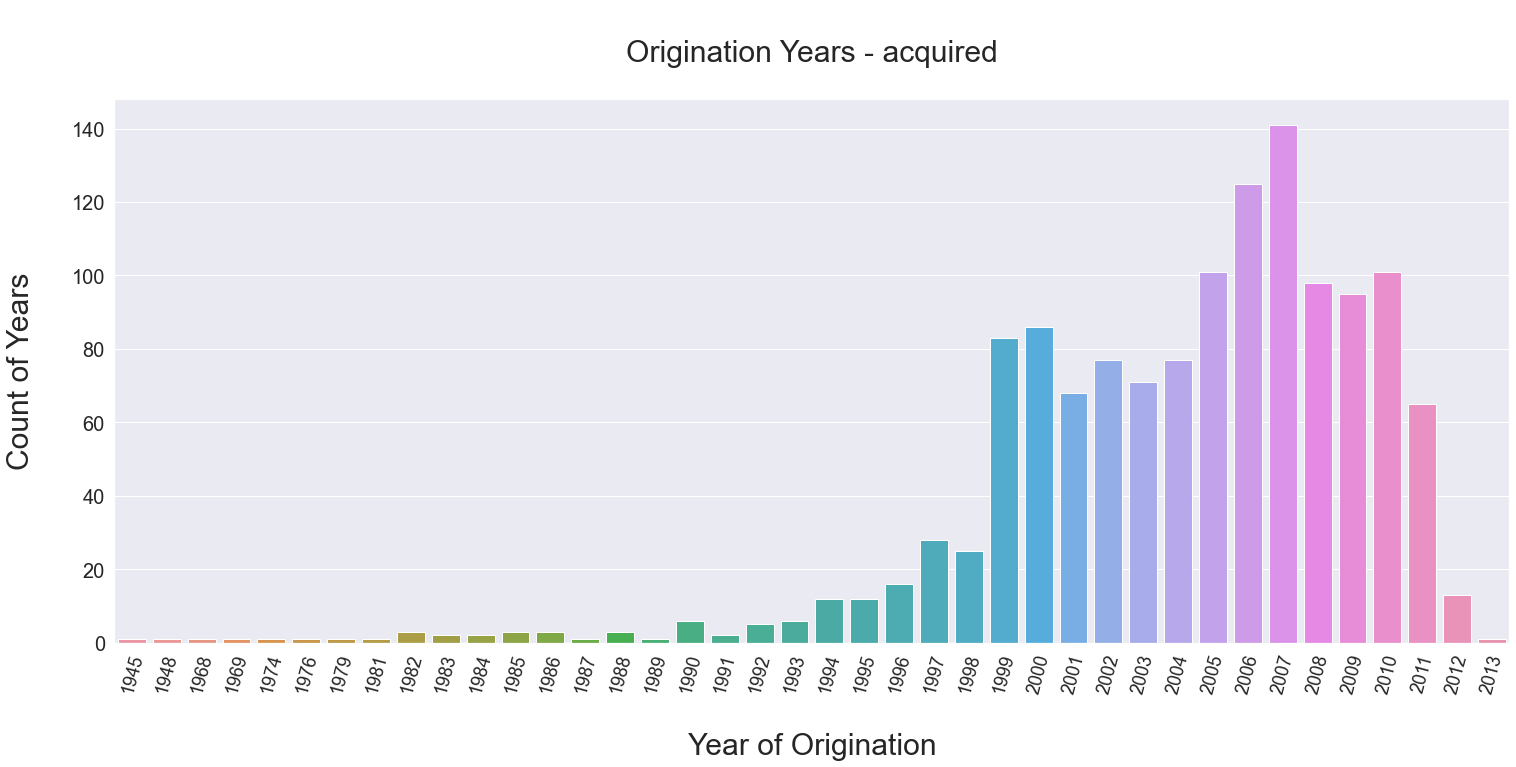

In [32]:
found_year('acquired')

Many companies that originated between 1990 to 2012 was acquired by some other companies.

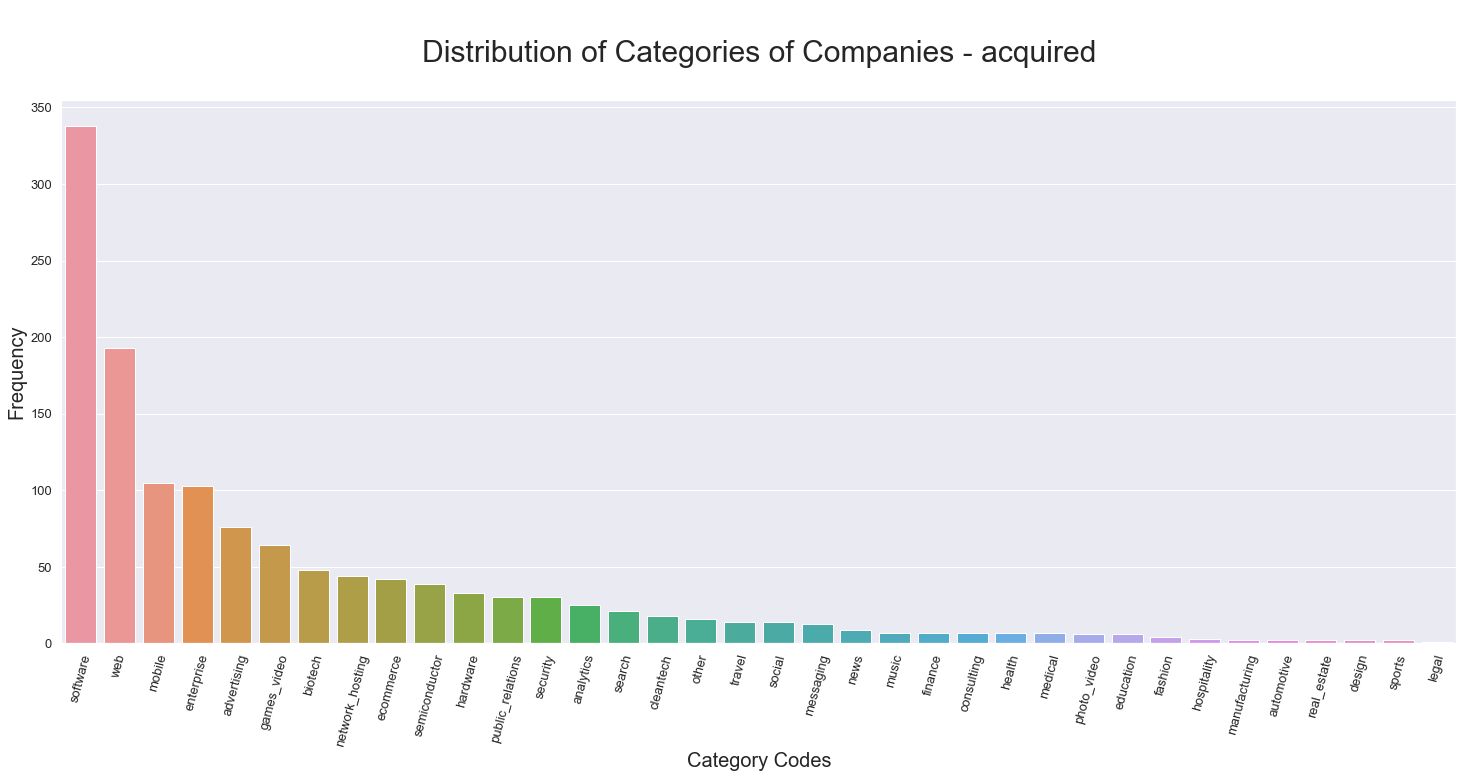

In [33]:
category_plot('acquired')

Acquired companies are also mainly from Technical field.

In [34]:
company[company.status == 'acquired'].closed_at.notnull().sum()

14

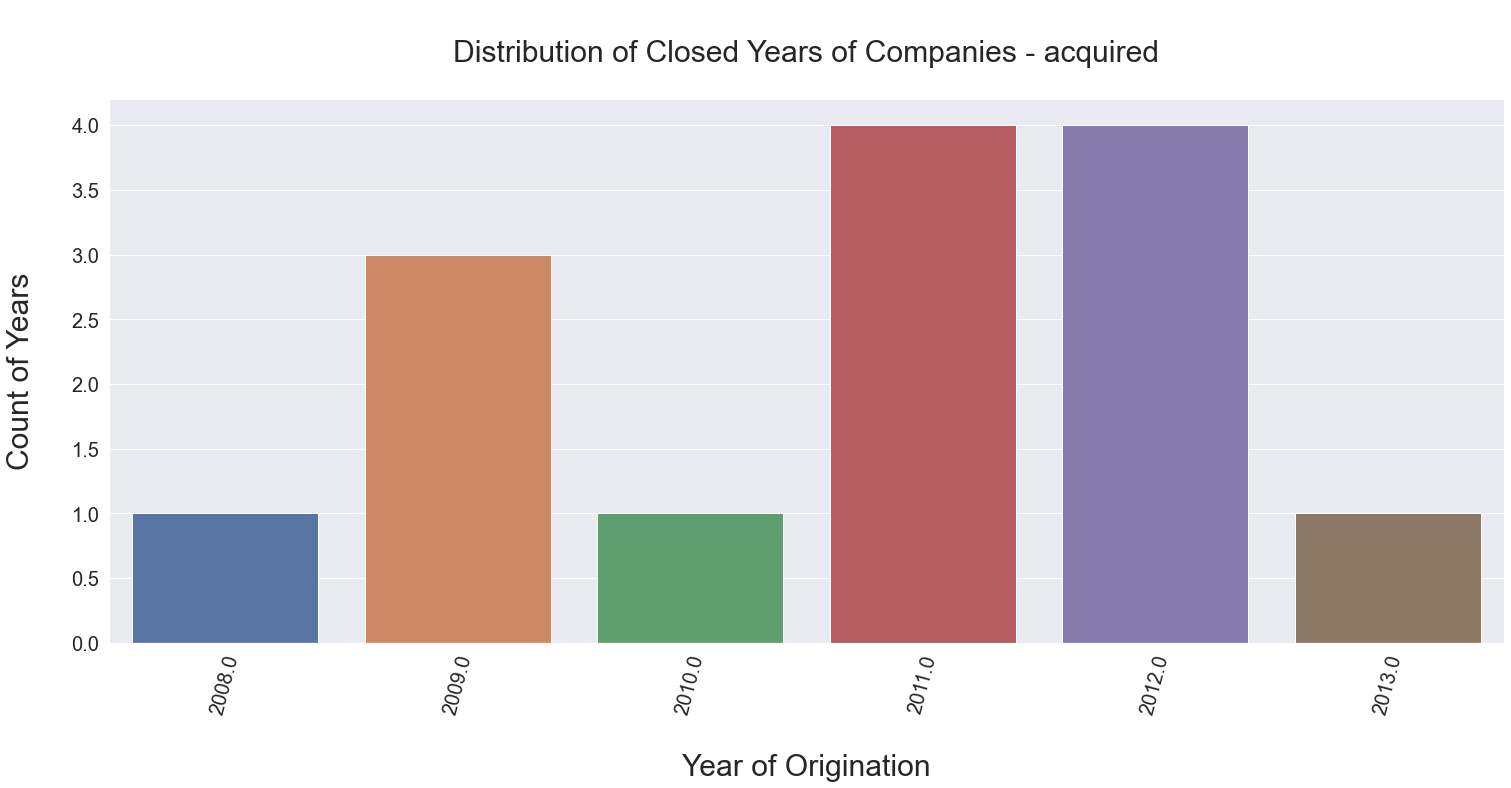

In [35]:
closed_year('acquired')

25 Acquired companies were closed between 2001 and 2013. The status is not showing Closed may be because the company after acquisition might have modified alone with its original name. 

In [36]:
sub7 =  pd.DataFrame(sub3[(sub3.status == 'acquired') & (sub3.closed_at.notnull())].category_code.value_counts())

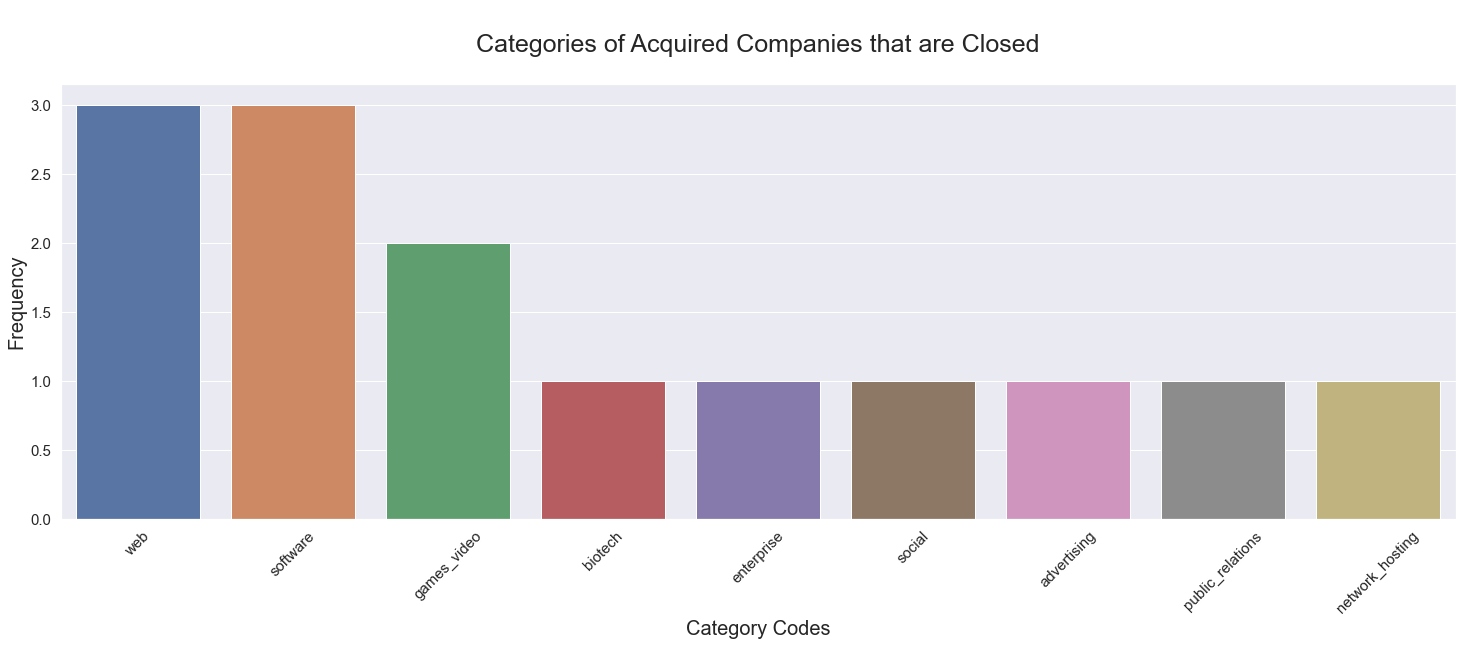

In [37]:
plt.figure(figsize=(25,8))
sns.barplot(x = sub7.index, y=sub7.category_code)

plt.title("\nCategories of Acquired Companies that are Closed\n", fontsize= 25)
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Category Codes', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)

plt.show()

Technical companies keep their dominance here as well, when considering the companies closed after acquisition. 

#### IPO

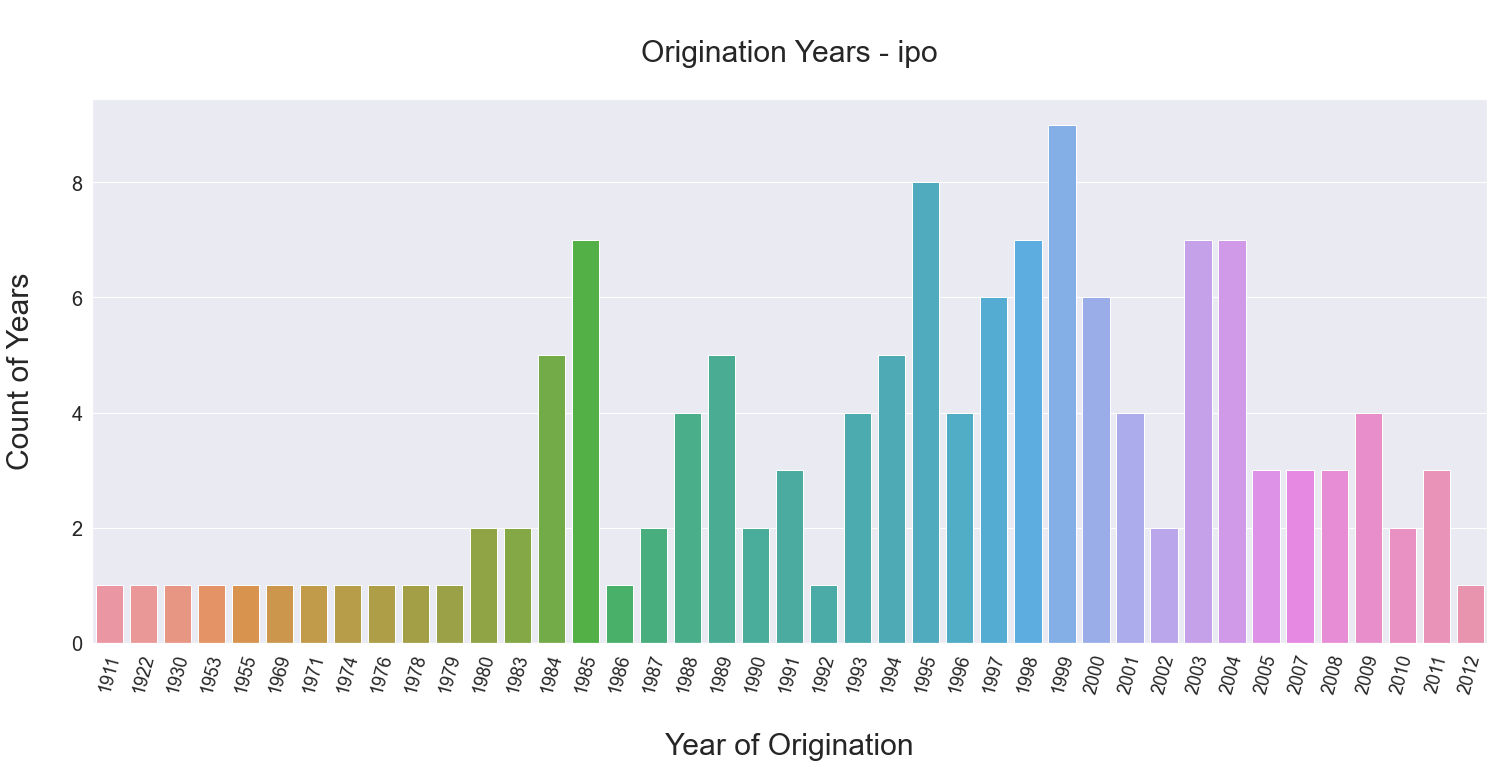

In [38]:
found_year('ipo')

In [39]:
company[company.status == 'ipo'].closed_at.notnull().sum()

0

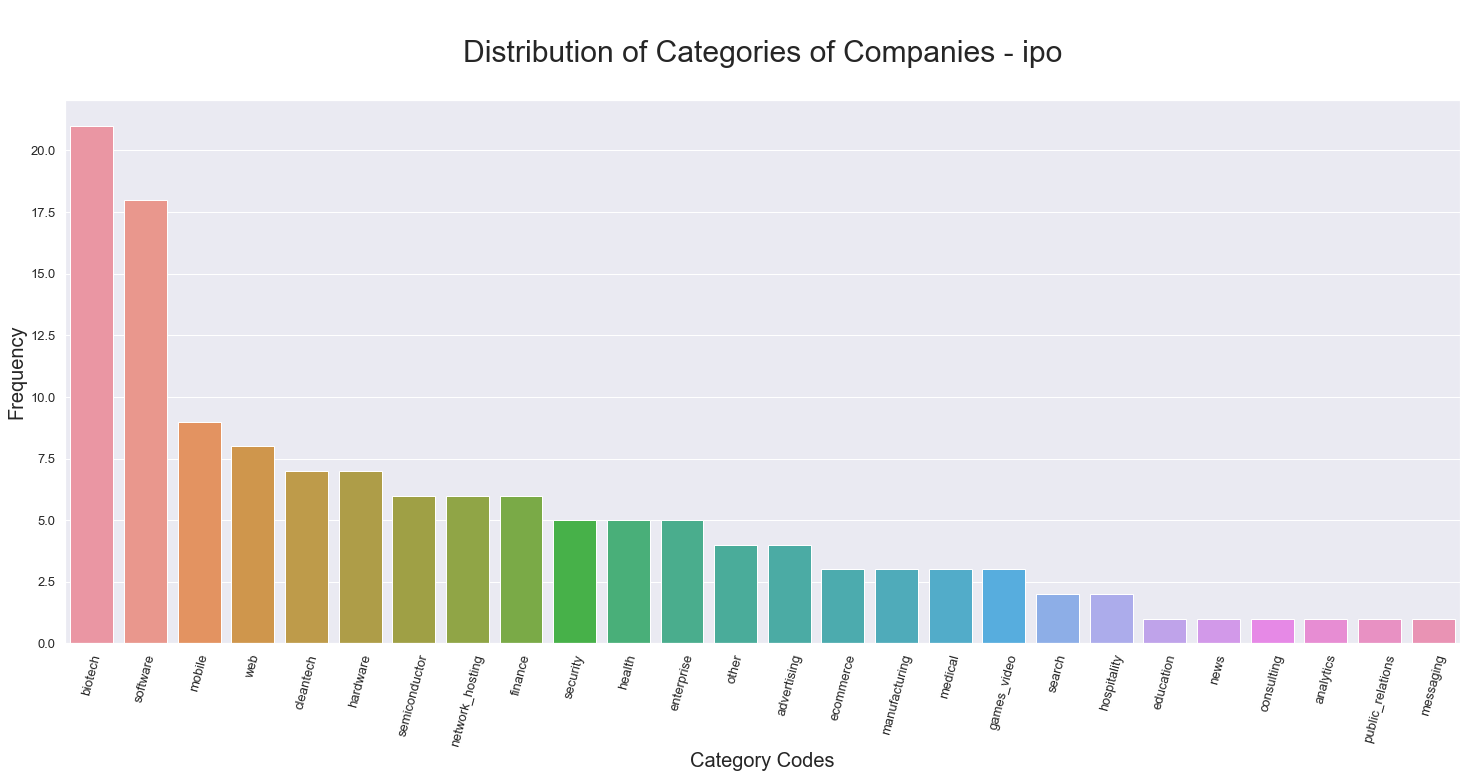

In [40]:
category_plot('ipo')

Biotech companies shows a visible dominance in IPO compnies.

#### Operational

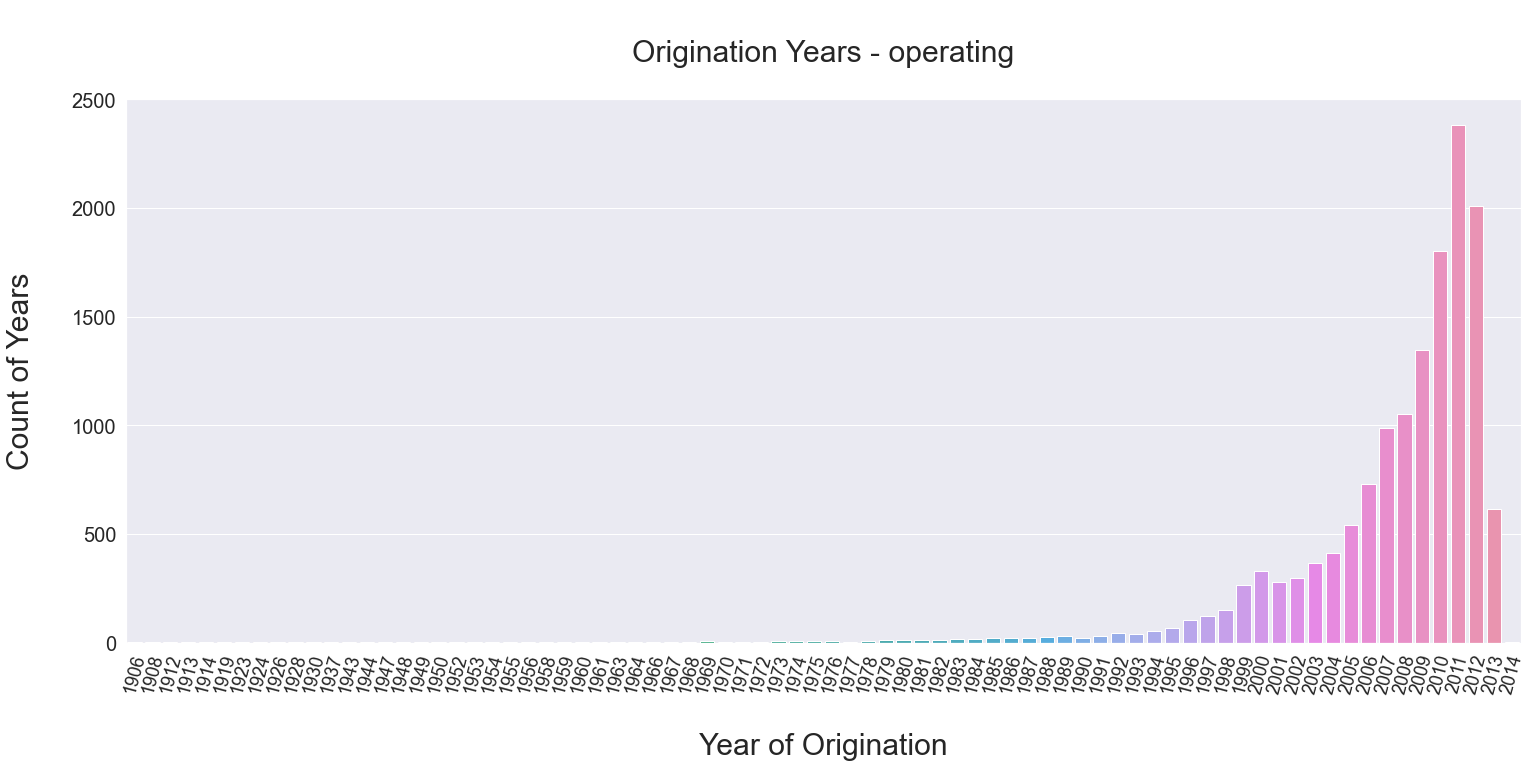

In [41]:
found_year('operating')

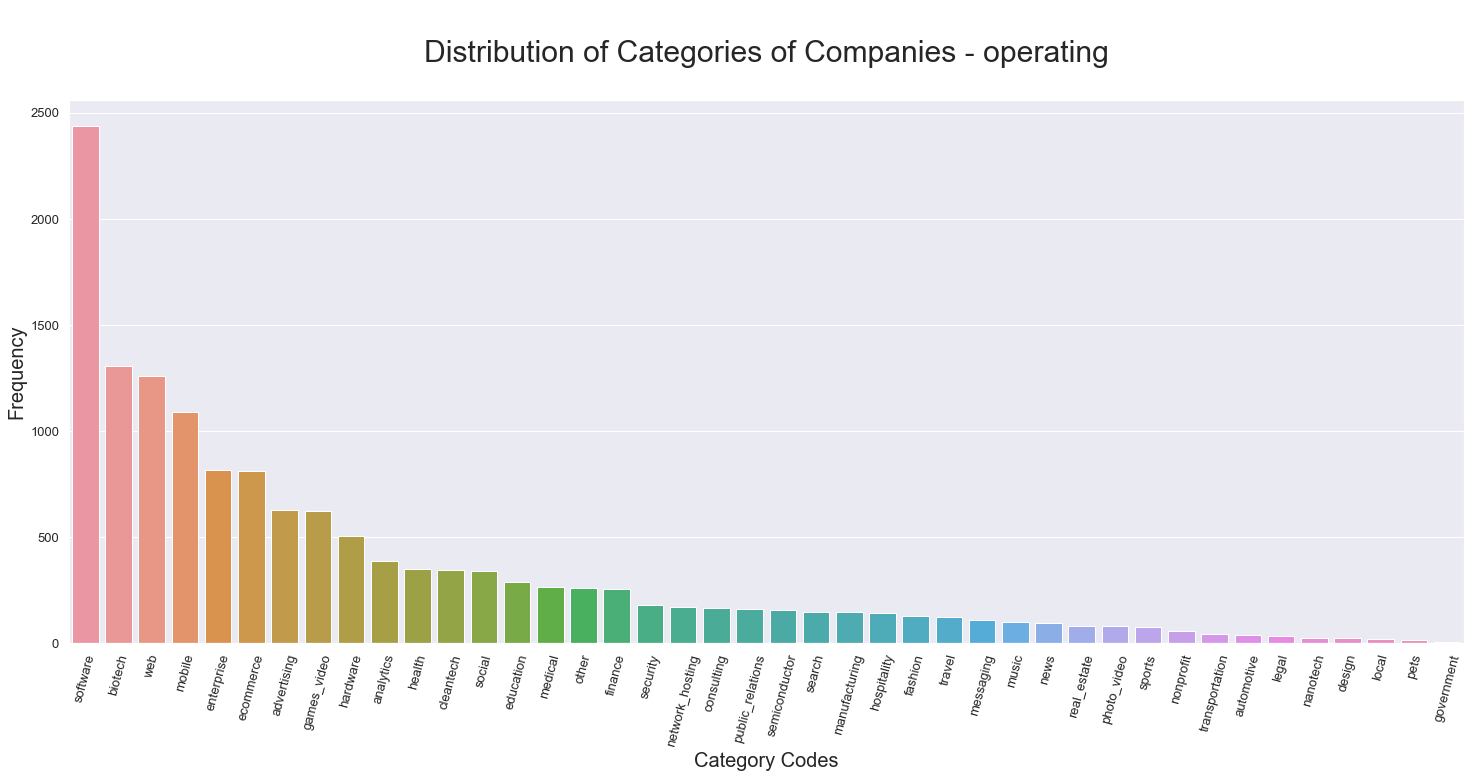

In [42]:
category_plot('operating')

In [43]:
company.columns

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng'],
      dtype='object')

### Analyzing Columns w.r.t. Status column 

In [44]:
def which_stage(year_cat):
    status = list(company.status.unique())
    for stat in status:
        year = pd.DataFrame(sub3[sub3.status == stat][year_cat].value_counts())
        plt.figure(figsize=(15,5))
        sns.barplot(x = year.index, y = year[year_cat])

        plt.xticks(rotation = 75,fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.xlabel('\nYear', fontsize = 14)
        plt.ylabel('Frequency\n', fontsize = 14)
        plt.title("\nDistribution of "+ year_cat+ ' - ' +stat+'\n', fontsize= 15)
        plt.show()
        print('\n**************************************************************************************************************************\n')

#### 1. first_investment_at

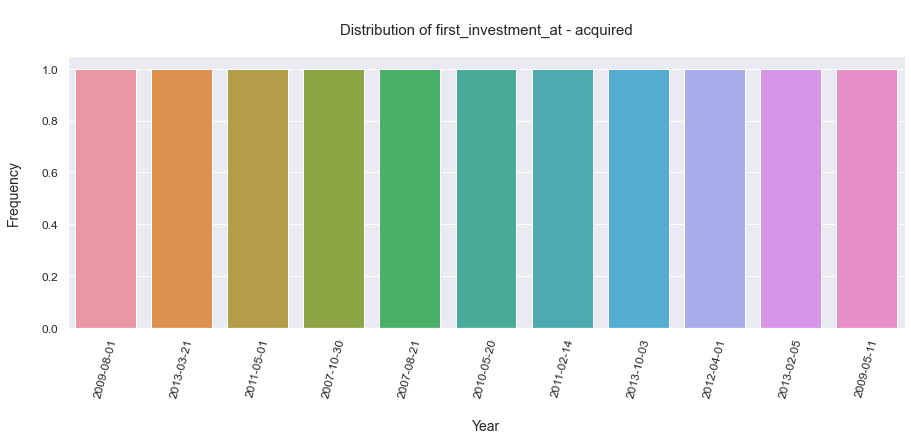


**************************************************************************************************************************



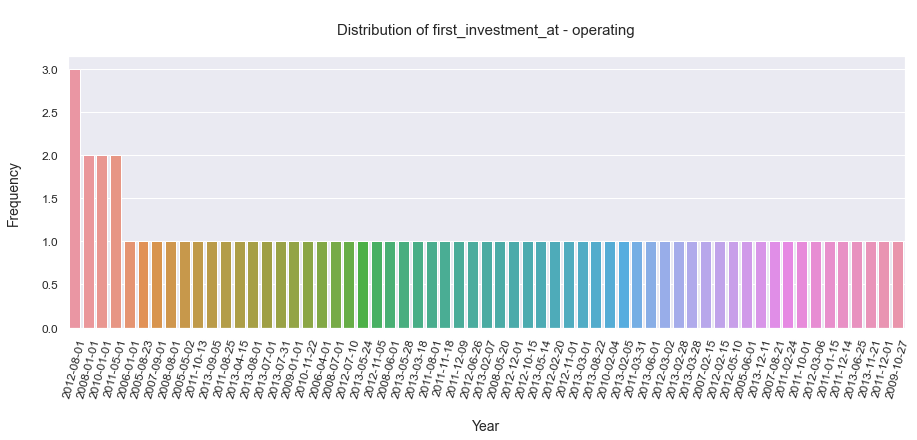


**************************************************************************************************************************



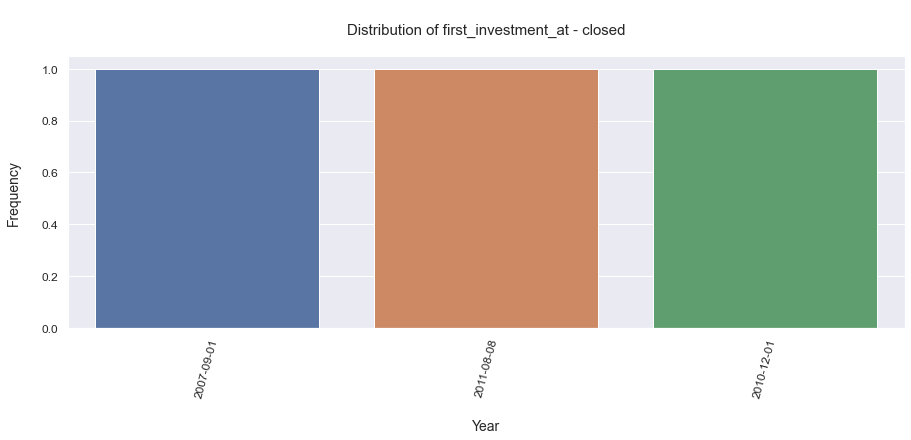


**************************************************************************************************************************



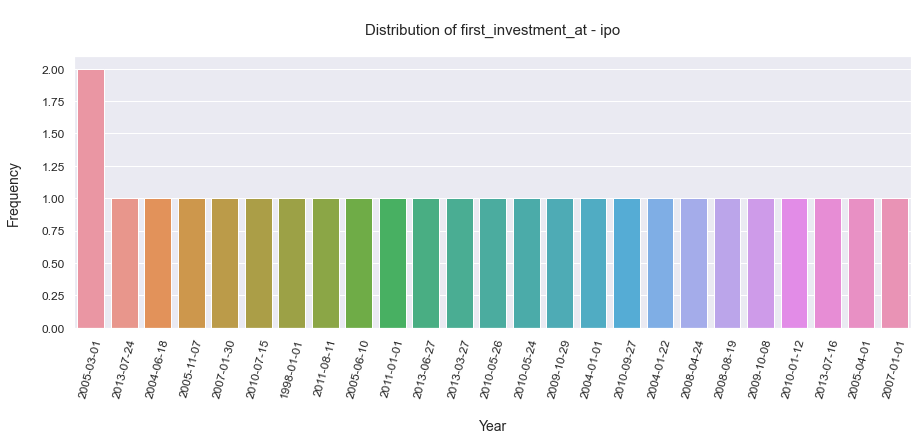


**************************************************************************************************************************



In [45]:
which_stage('first_investment_at')

#### 2. last_investment_at

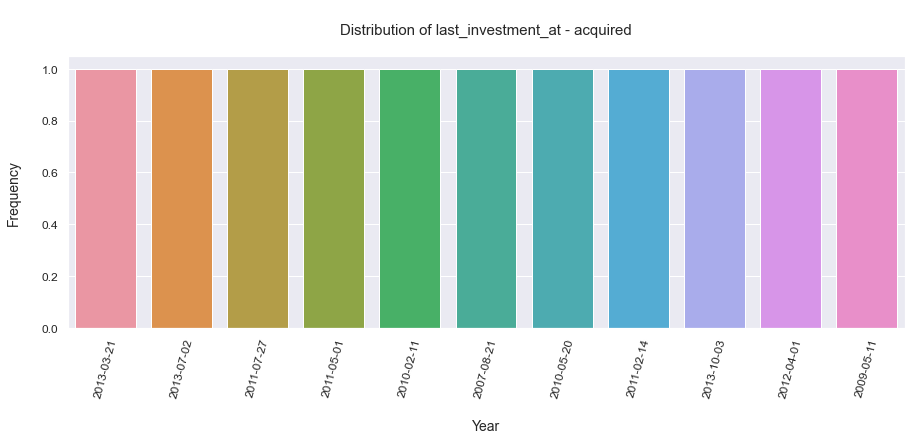


**************************************************************************************************************************



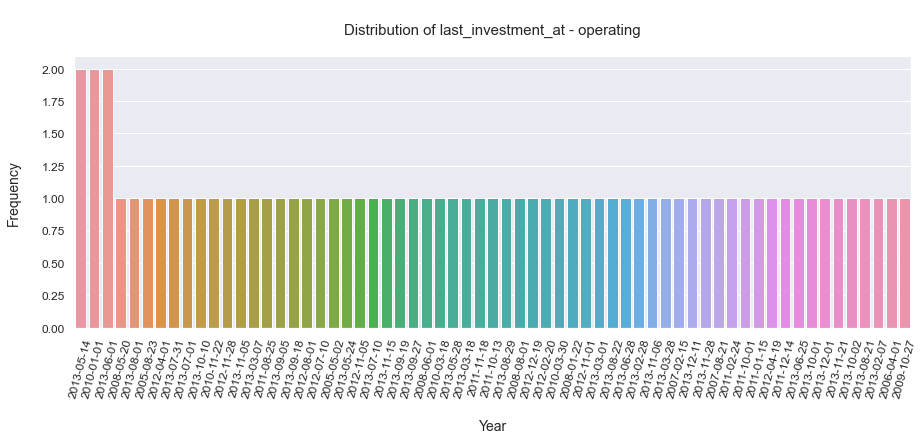


**************************************************************************************************************************



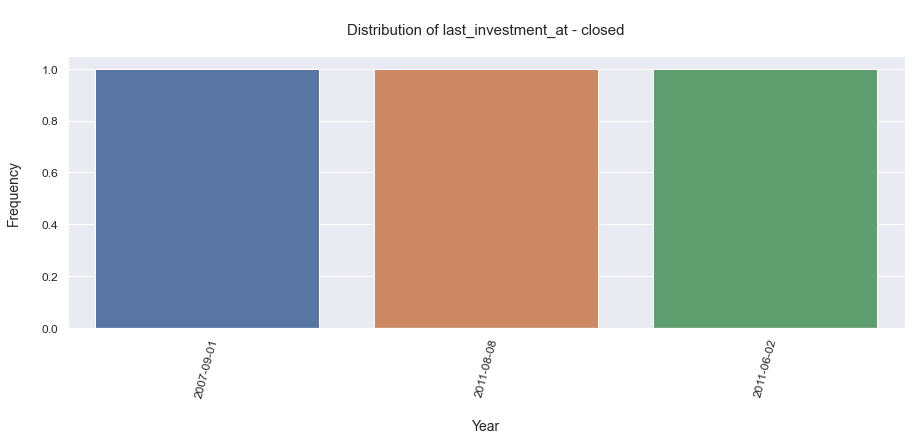


**************************************************************************************************************************



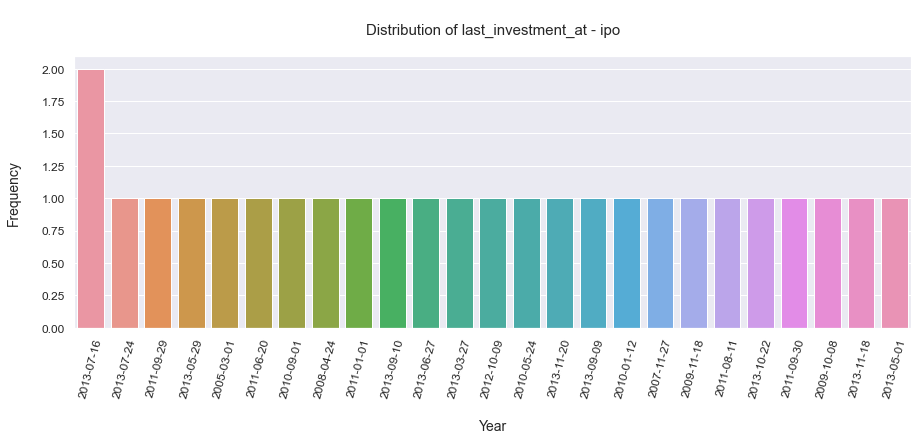


**************************************************************************************************************************



In [46]:
which_stage('last_investment_at')

#### 3. first_funding_at

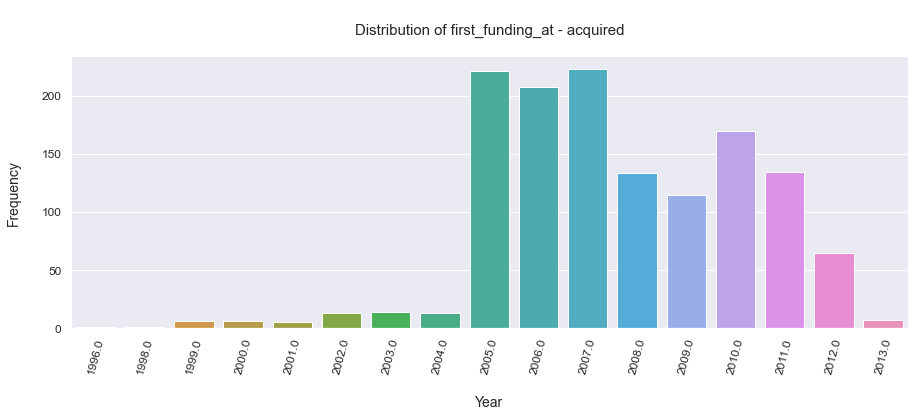


**************************************************************************************************************************



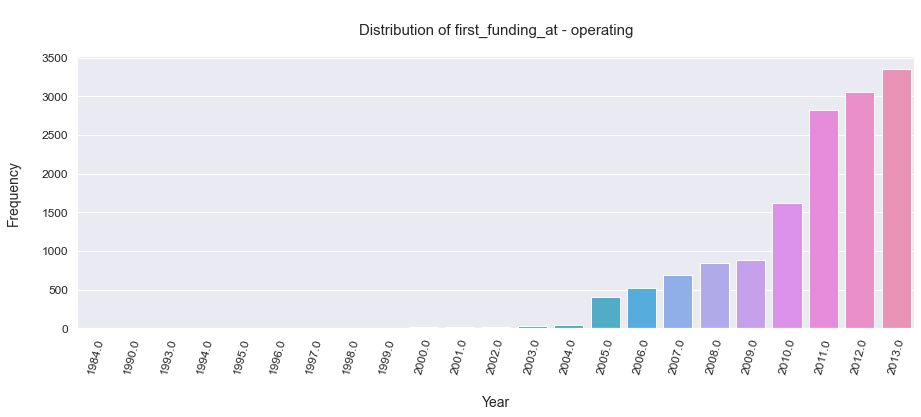


**************************************************************************************************************************



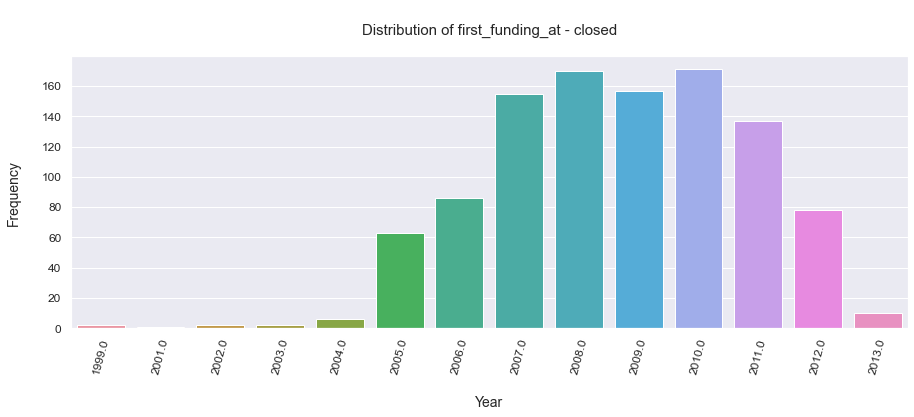


**************************************************************************************************************************



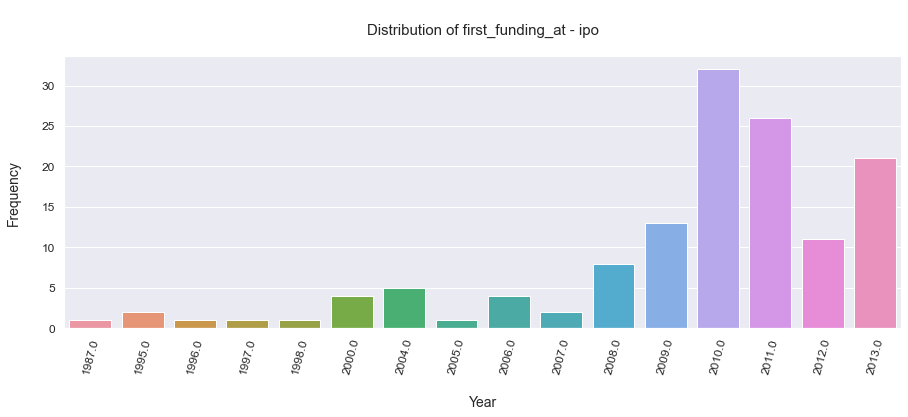


**************************************************************************************************************************



In [47]:
which_stage('first_funding_at')

#### 4. last_funding_at

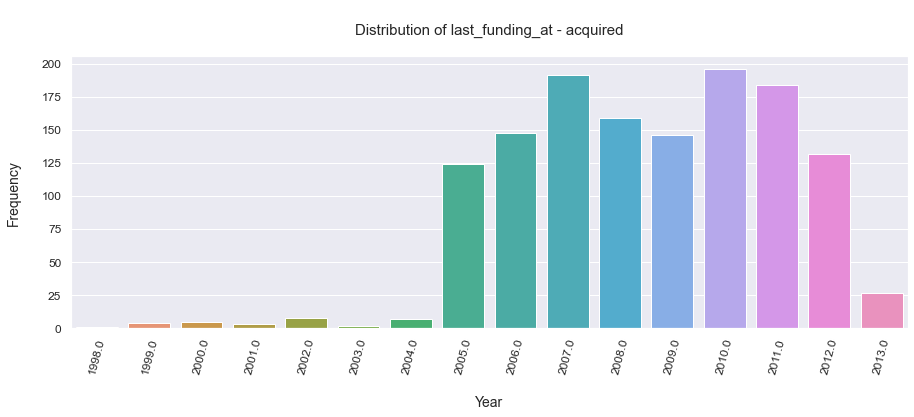


**************************************************************************************************************************



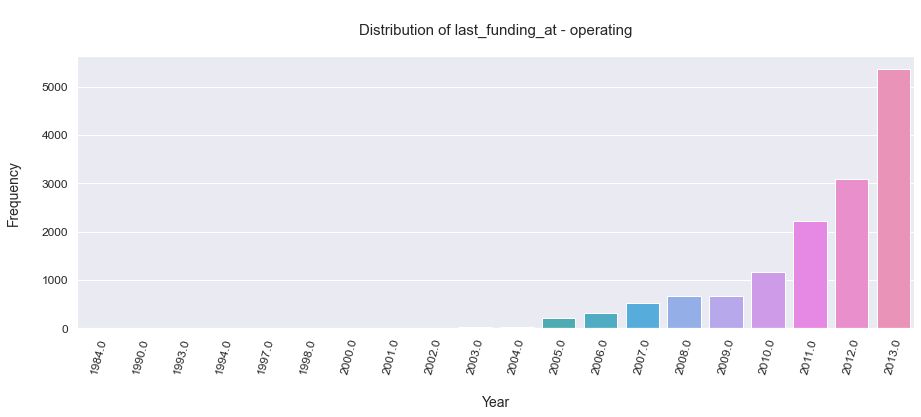


**************************************************************************************************************************



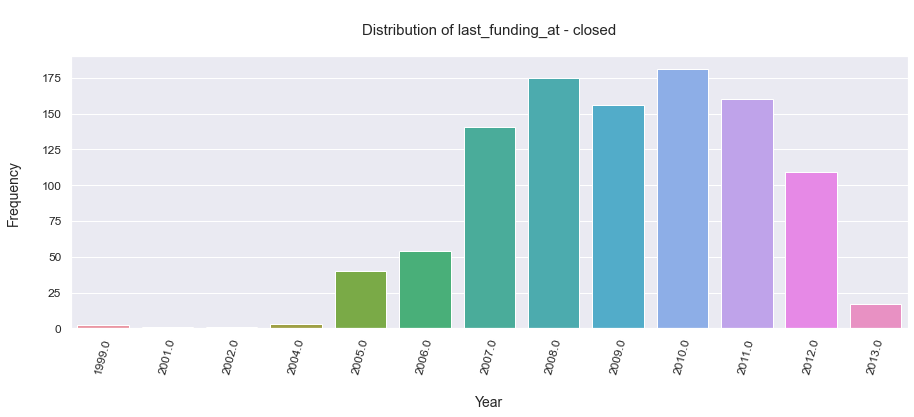


**************************************************************************************************************************



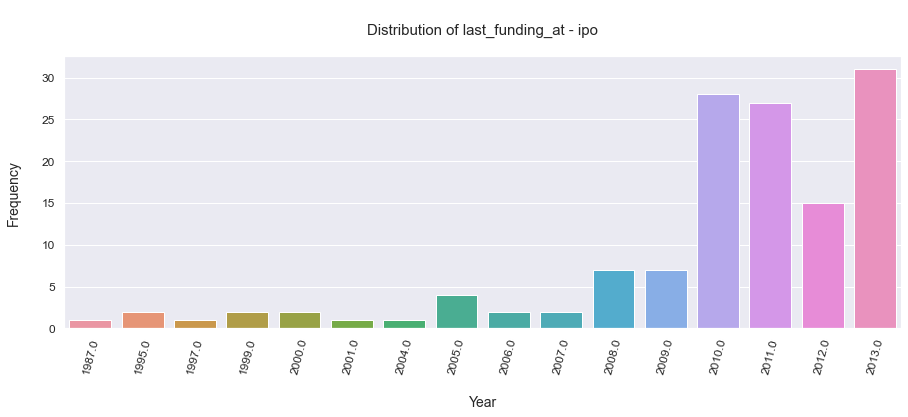


**************************************************************************************************************************



In [48]:
which_stage('last_funding_at')

#### 5. first_milestone_at

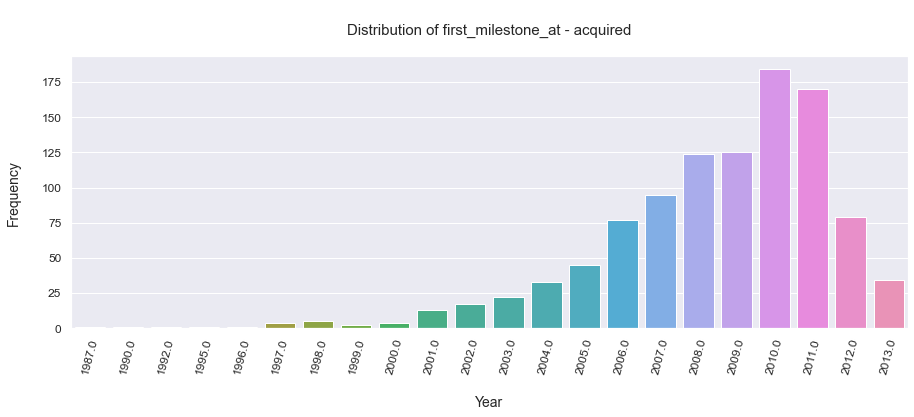


**************************************************************************************************************************



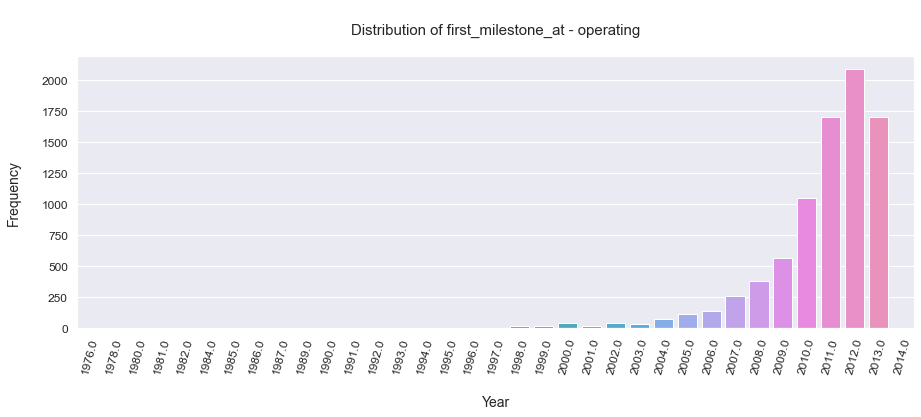


**************************************************************************************************************************



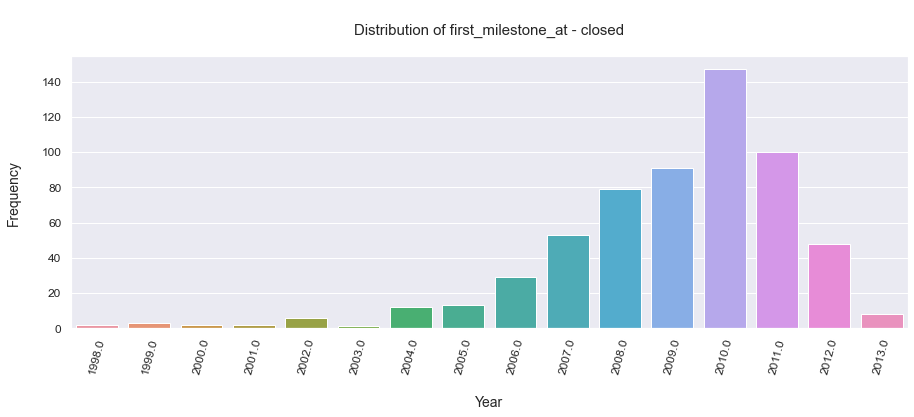


**************************************************************************************************************************



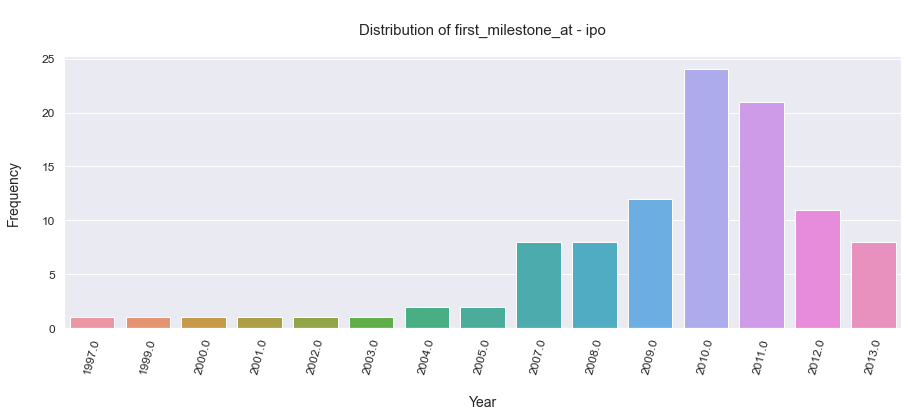


**************************************************************************************************************************



In [49]:
which_stage('first_milestone_at')

#### 6. last_milestone_at

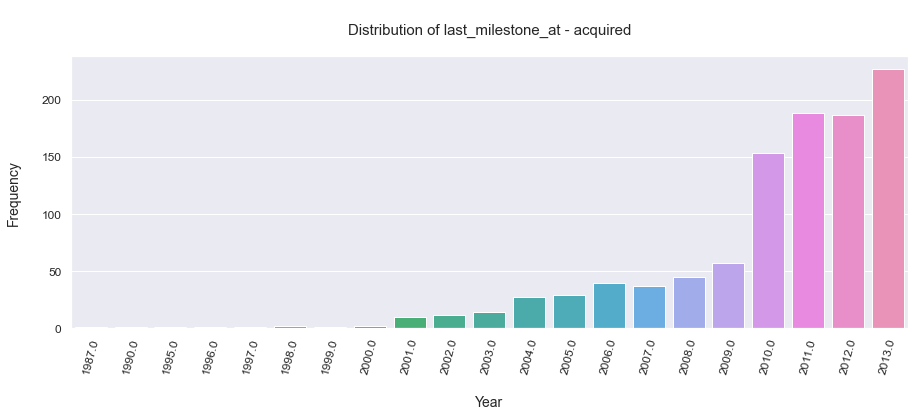


**************************************************************************************************************************



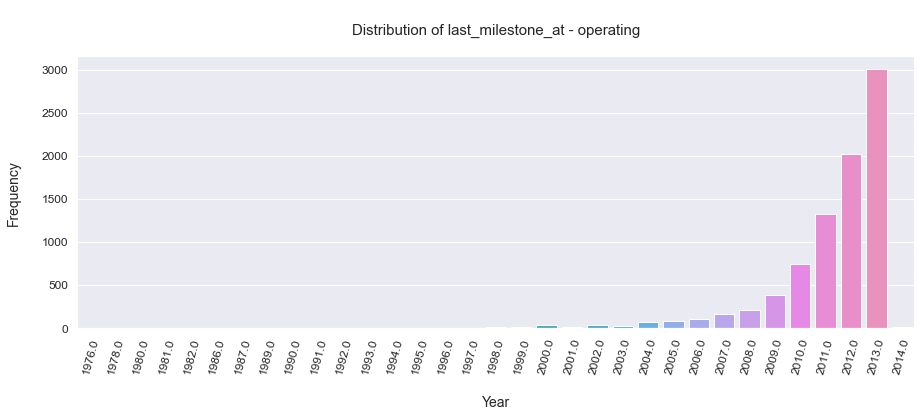


**************************************************************************************************************************



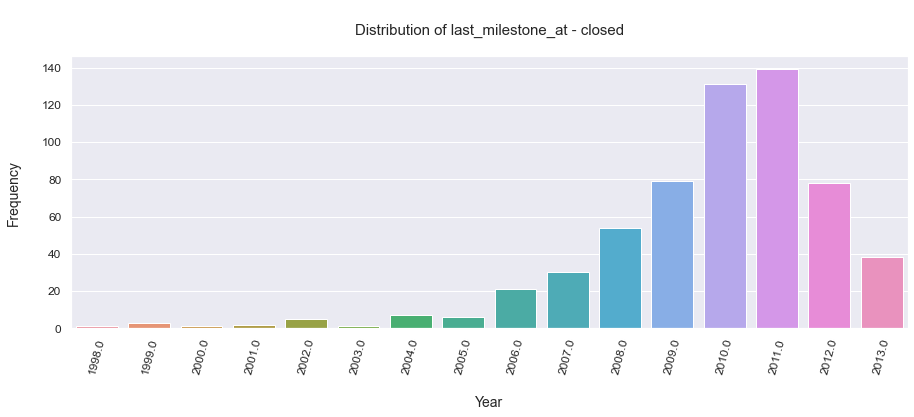


**************************************************************************************************************************



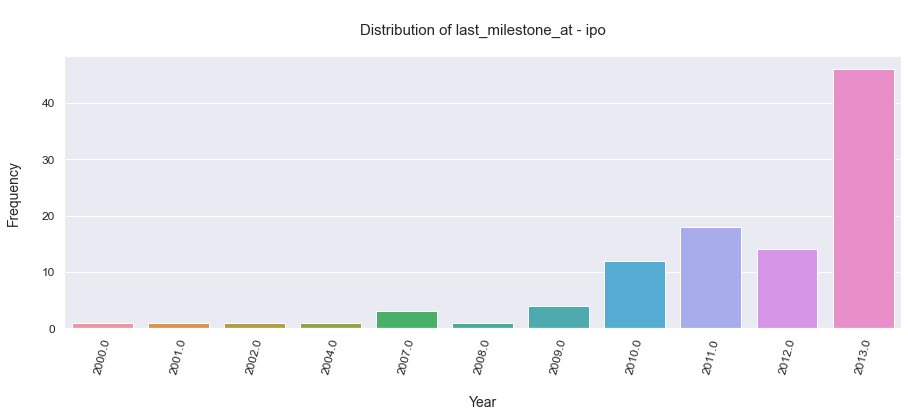


**************************************************************************************************************************



In [50]:
which_stage('last_milestone_at')

In [51]:
import plotly.express as px

In [52]:
fig = px.scatter_geo(company,lat='lat',lon='lng', hover_name="status", color='status')
fig.update_layout(title = 'Startups vs Status', title_x=0.5)
fig.show()